In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv(r"D:\projects dataset\second\sentiment_tweets3.csv")

In [3]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [6]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [7]:
df.shape

(10314, 3)

## Data Cleaning

In [9]:
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['count','percentage'])
print("the count and percentage of missing data")
missing_data

the count and percentage of missing data


,count,percentage
label (depression result),0,0.0
message to examine,0,0.0
Index,0,0.0


In [19]:
df.columns=['index','message','label']
df.head()

,index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


Percentage for default

0    77.56
1    22.44
Name: label, dtype: float64


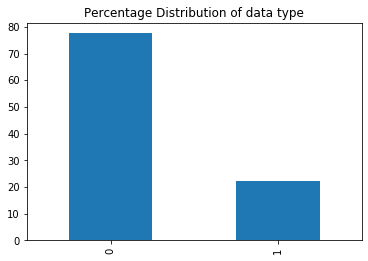

In [20]:
%matplotlib inline
print("Percentage for default\n")
print(round(df.label.value_counts(normalize=True)*100,2))
round(df.label.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution of data type')
plt.show()

In [21]:
df.head()

,index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [22]:
df.drop(columns = ['index'])

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## Data cleaning

In [26]:
import string

def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[''""...]','',text)
    text = re.sub('\n', '', text)
    return text

clean_message = lambda x: text_clean(x)

In [27]:
df['clean_message'] = pd.DataFrame(df.message.apply(clean_message))
df.head()

,index,message,label,clean_message
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment i missssssssss him...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need to send em to my accountant tomorr...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace myspacecomlookthunder


### Model Training

In [117]:
from sklearn.model_selection import train_test_split

#df1 = df.drop(columns=['message','index'])
X = df.clean_message
y = df.label


X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train :',len(X_train))
print('y_train :',len(y_train))
print('X_test :',len(X_test))
print('y_test :',len(y_test))

X_train : 8251
y_train : 2063
X_test : 8251
y_test : 2063


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer()
lr = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [119]:
model = Pipeline([('vectorizer', tfidf),('classifier',lr)])

model.fit(X_train, X_test)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [122]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(y_train)

confusion_matrix(predictions, y_test)

array([[1614,   29],
       [   0,  420]], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy :", accuracy_score(predictions, y_test))
print("Precision Score :", precision_score(predictions, y_test))
print("Recall Score :", recall_score(predictions, y_test))

Accuracy : 0.9859428017450315
Precision Score : 0.9354120267260579
Recall Score : 1.0


## Example for checking the model scores

### "0" represent no spam and "1" represent spam message

In [124]:
example = [" Hi this is my first tweet!!"]
result = model.predict(example)

print(result)

[0]


In [126]:
example1 = ["No Depression by Rohit Kumar"]
result1 = model.predict(example1)

print(result1)

[1]
